In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statistics
import warnings
import seaborn as sns
import random as rd
import sys
sys.path.append('../scripts')
from eda_Read_data import ReadData
from cleaning import CleanDataFrame
from eda_plot import Plot

### Importing Data

In [3]:
loader = ReadData()
sample_df = loader.read_csv('../data/sample_submission.csv')
sample_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
store_df = loader.read_csv('../data/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
test_df = loader.read_csv('../data/test.csv')
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
train_df = loader.read_csv('../data/train.csv')
train_df.head()

c:\Users\Stella\Desktop\Week 3\10Academy-Pharmaceutical-Sales-prediction-Project\notebooks\../scripts\eda_Read_data.py:44: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Investigating the data

In [21]:
#To show data types of each row
test_df.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [26]:
#To show data types of each row
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [28]:
train_df.shape

(1017209, 9)

In [30]:
test_df.shape

(41088, 8)

In [7]:
# Find missing values
train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [8]:
test_df.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

#### Removing missing values in the test data

In [13]:
#Instantiating the class to clean data
cleaner=CleanDataFrame()


In [20]:
# Removing missing values in the "open" column since we cannot predict whether a store was closed or open
test_noNull=cleaner.remove_null_row(test_df,["Open"])
test_noNull.isna().sum()


Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Exploration on the test dataset

In [35]:
plot= Plot()

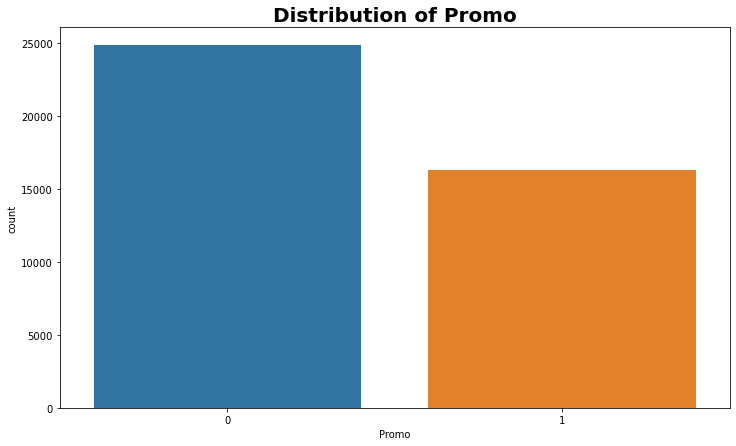

In [46]:
plot.plot_count(test_noNull, 'Promo')

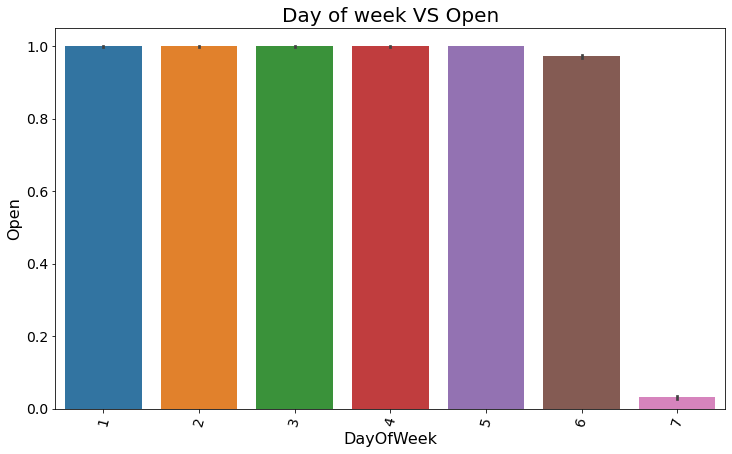

In [44]:
plot.plot_bar(test_noNull,"DayOfWeek","Open","Day of week VS Open", "DayOfWeek","Open")

### The visualization shows that most stores normally remain closed on Sunday(Last day of the week) 

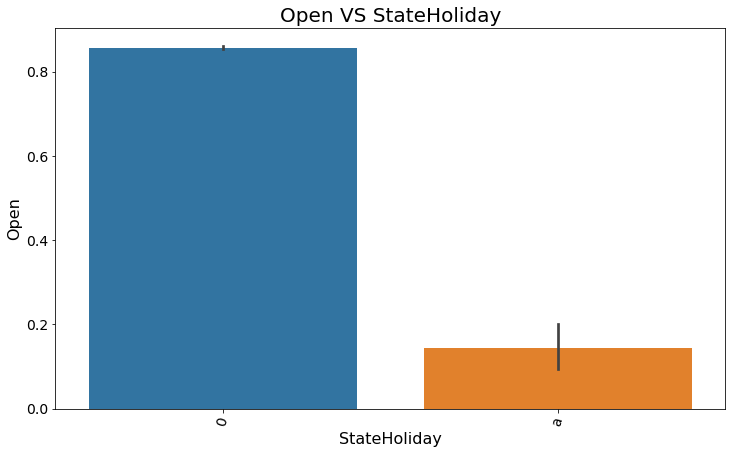

In [39]:
plot.plot_bar(test_df,"StateHoliday","Open","Open VS StateHoliday", "StateHoliday","Open")

### The visualization indicates that most stores remain closed during state holidays, but few stores are open on punlic holidays.

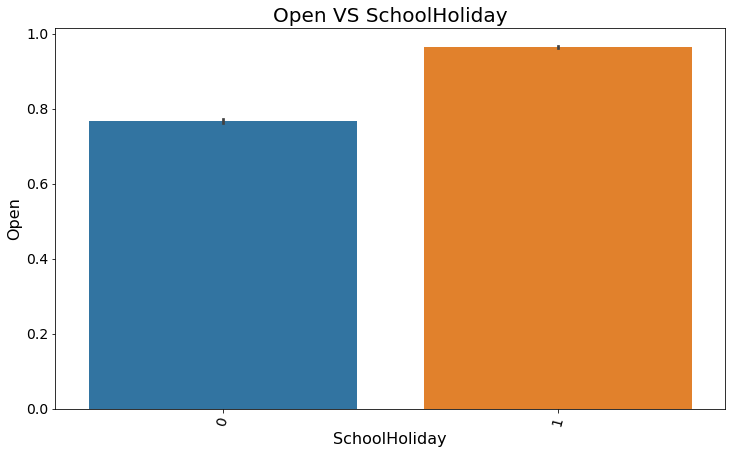

In [40]:
plot.plot_bar(test_df,"SchoolHoliday","Open","Open VS SchoolHoliday", "SchoolHoliday","Open")

### More stores are open on school holidays than when there is no school holiday. However school holidays do not affect the opening of stores as much as state holidays.

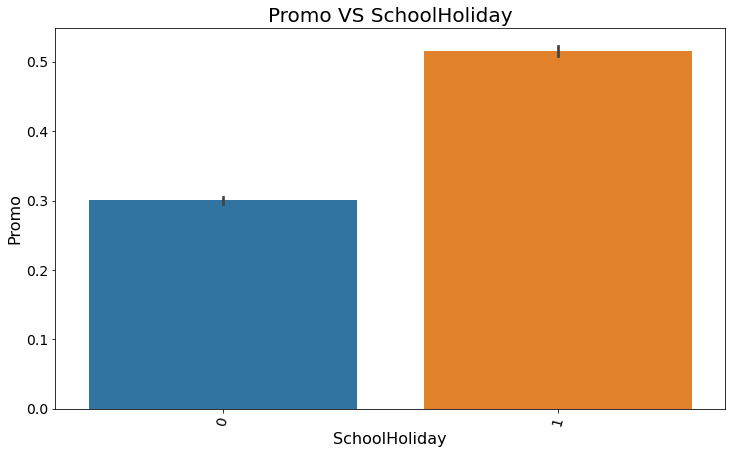

In [41]:
plot.plot_bar(test_df,"SchoolHoliday","Promo","Promo VS SchoolHoliday", "SchoolHoliday","Promo")

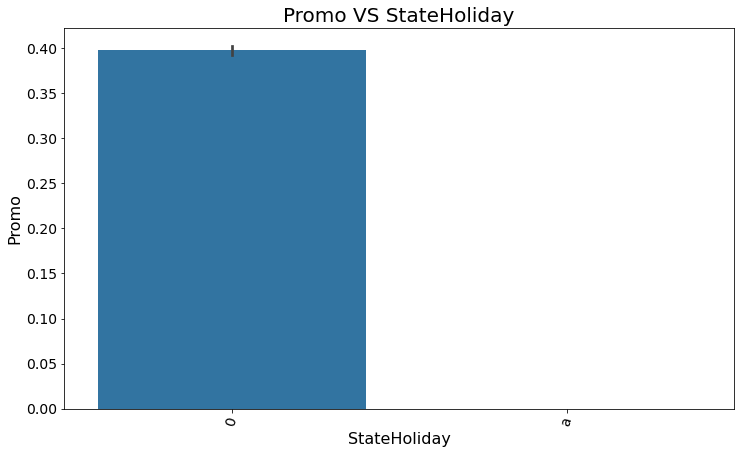

In [42]:
plot.plot_bar(test_df,"StateHoliday","Promo","Promo VS StateHoliday", "StateHoliday","Promo")

### This shows that no promot